# The Rowland geometry for Arcus

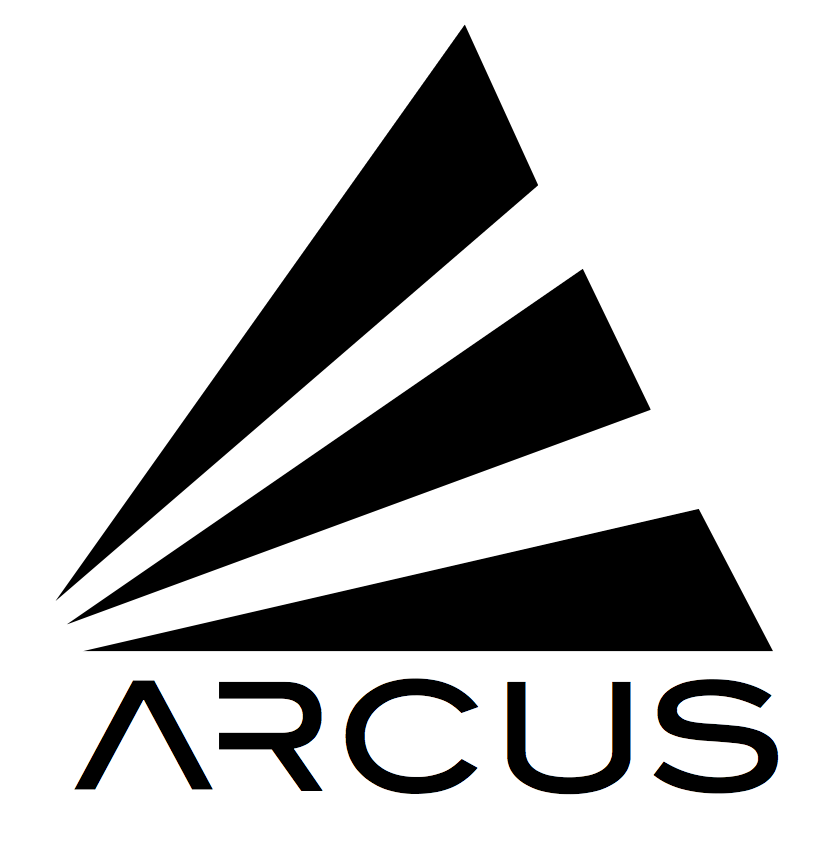

### Revision status
Last revision in version control:

- Author: Hans Moritz Guenther <hgunther@mit.edu>
- commit 995544198eefa68c4ab06ccf71b924ca972064df
- Date:   Thu Sep 14 15:55:37 2017 -0400


This document is git version controlled. The repository is available at https://github.com/hamogu/arcus.
See git commit log for full revision history.

Code was last run with:

- MARXS ray-trace code version 1.2.dev607 (commit hash: 3ea4b76a2e from 2017-09-07)
- ARCUS python code version 0.0.dev92 (commit hash: 5fbe1393c5 from 2017-09-12)
- ARCUS CALDB version hash: 98b1481 (commited on 2017-08-19 )


In [39]:
from nbtemplate import display_header, display_codetoggle
display_header('RowlandGeometry.ipynb')

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

## Purpose

The purpose for this document is to lay out the mathematical formulas and the numerical values chosen for the Rowland tori in Arcus. It describes some of the motivations and derivation to arrive at these numbers, but that description is not necessarily sufficient to derive a unique solution. Tables for parameters for each Rowland torus and examples how to derive positions and orientations for CAT gratings and CCD detectors that are placed on these tori  are given.

**The Rowland geometry is the cornerstone of the Arcus optical design. Any change in the parameters, however minor, needs to be propagated to many different working groups and studies immediately.**

## Introduction

The Arcus mission provides high-resolution X-ray spectroscopy coupled with unprecedented effective area. Incoming X-rays are focused using Silicon Pore Optics (SPOs) that are developed in the context of the Athena mission. The area under the SPOs is covered by critical angle transmission (CAT) gratings which disperse the light onto a strip of CCD detectors. In order to achieve the best possible spectral resolving power at all detected grating orders, the CAT gratings need to be mounted on the surface of a torus, called the Rowland-torus. (Note that the gratings are not tangential to the torus. Their orientation is discussed in detail below.) At the same time, the CCDs are tangential to the "other side" of the same torus. We first discuss the traditional Rowland torus design as it is employed in e.g. the Chandra/HETGS and then detail the modifications for Arcus, where the axis of the torus is tilted with respect to the optical axis. Also, Arcus employs more than one torus, and those tori are partially overlapping.


## The traditional torus geometry
In the nineteenth century, spectroscopists realized that a flat grating with constant grating period requires collimated light with parallel plane waves to realize the full resolving power of the spectrograph. To avoid aberations for incoming light that is focused onto a point, either the grating period has to be variable or the grating needs to be curved. One possible solution is to curve the grating on a the surface of a circle and place a curved detector on the other side of the circle. This arrangement is called the "Rowland circle geometry" and can be extended to three dimensions as a "Rowland torus". See [Paerels, 2010](https://doi.org/10.1007%2Fs11214-010-9719-y) for a discussion of this concept and [Beuermann et al., 1978](http://adsabs.harvard.edu/abs/1978ApOpt..17.2304B) for a formal derivation. In practice, several simplifications are done for Rowland spectrometers in X-ray observatories. Instead of a single, large, curved grating many small gratings are mounted such that their centers match the surface of the torus. Similarly, although these finite gratings deviate from the surface of the torus, they typically have a constant grating period, making the manufacturing process much simpler. For gratings that are just a few cm on each side, the resulting error is typically much less than that caused by the PSF of the telescope. One example of a modern Rowland geometry X-ray spectrometer is the High-energy-transmission grating spectrometer(HETGS) on Chandra, see [Canizares et al., 2005](http://adsabs.harvard.edu/abs/2005PASP..117.1144C).


## Equations to describe a torus

There are several different ways to describe a torus mathematically. Different expressions have different advantages and disadvantages for particular use cases. For example, the parametric torus equation lends itself well to triangulate the surface of the torus for visualization, but the quartic form is more useful to numerically solve for the intersection points between the torus and a ray in ray-tracing.

We use the following conventions: $r$ determines the radius of the Rowland
circle, $R$ is the distance from the center of the circle to the symmetry axis of the torus. If $r < R$, the torus has an inner hole like a doughnut, and if $r > R$ the inner parts of the torus overlap with each other (called a "spindle torus").

### The torus
The following quartic equation describes a torus where the y-axis is the symmetry axis. The roots of this equation are the (x,y,z) coordinates of points on the surface of the torus:

$$(x^2 + y^2 + z^2 + R^2 - r^2)^2 = 4 R^2 (x^2 + z^2)\ \ .(1)$$

This equation becomes very unwieldy if the symmetry axis does not coincide with one of the axes of the coordinate system. 

Another way to express coordinates is to parameterize them by two angles, $\theta$, which describes points on the Rowland circle with radius $r$, and $\varphi$, which rotates this circle around the axis of symmetry:

$$\begin{pmatrix}x\\y\\z\\ \end{pmatrix} = \begin{pmatrix}(R + r \cos{\theta}) \cos\varphi\\
r \sin\theta\\(R + r \cos{\theta}) \sin\varphi\\ \end{pmatrix}\ \ (2)$$

Unlike the quartic given before, this equation can be generalized with reasonable effort to tori where the center $\vec c$ does not coincide with the origin of the coordinate system and the axis of symmetry is not parallel to one of the axes of the coordinate system. The axis of symmetry is given by a unit vector $\vec e_y$. We define a vector $\vec e_R(\varphi) = \vec e_x \cos\varphi + \vec e_z \sin\varphi\ $  and can now write a generalized torus equation for points $\vec p$:

$$\vec p(\varphi, \theta) = \vec c + R \; \vec e_R(\varphi) + r \; (\vec e_y \sin \theta + \vec e_R(\varphi) \cos \theta)\ \ . (3)$$

For a torus that is translated and rotated with respect to the coordinate system, we only need to rotate the $\vec e_x$, $\vec e_y$, and $\vec e_z$ and specify $\vec c$. The table below will do just that. Alternatively, the points on the torus can be calculated using the original coordinate system using either equation (1) or (2) and then be transformed into the new coordinate system. 

### Homogeneous coordinates
We write coordinate transformations in [homogeneous coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates). This is a well known concept in geometry and computer vision and described in standard textbooks. In short, points and vectors (x,y,z) are written in homogeneous coordinates as ($x_h$, $y_h$, $z_h$, $w_h$). $w_h$ is a kind of scale factor. For a point in 3-d space $x = x_h / w_h$, $y = y_h / w_h$, and $z = z_h / w_h$. Vectors in 3-d space (directions) are expressed as points at infinity, i.e. $w_h = 0$. The advantage of homogeneous coordinates is that the transformation between two coordinate systems can be written as a simple $4\times 4$ matrix, which contains both translations and rotations and that multiple coordinate transformations can be chained by just multiplying their transformation matrices together. Below, we give the transformation matrices to transform our canonical torus (origin at (0, 0, 0) and y-axis as symmetry axis) into the Rowland torus for each channel.

### Coordinate system

The coordinate systems for Arcus have not been formally fully specified yet; when the Arcus project adopts a standardized set of coordinate systems, the tables in this memo will be updated.

In the meantime, we adopt the following definitions: Every optical channel has an optical channel coordinate system (OCCS) associated with it. The origin of this coordinate system is at the nominal focal point for this system. The $z$-axis coincides with the optical axis, such that astronomical sources are located at $z=+\infty$. The positive $x$-axis is the direction of dispersion for the first channel and opposite to the direction of dispersion for the second channel (this way, both $x$-axes point in the same direction).

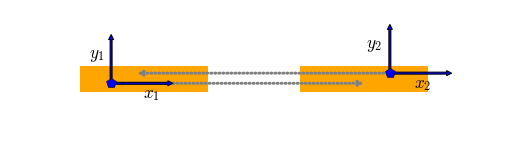

In [41]:
from arcus.arcus import Det16 
from arcus.arcus import defaultconf as conf
from transforms3d.affines import decompose

det16 = Det16(conf)

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111) #, aspect='equal')

for e in det16.elements:
    trans, rot, zoom, shear = decompose(e.pos4d)
    det = patches.Rectangle(trans[[0, 1]] - zoom[[1,2]], zoom[1] * 2, zoom[2] * 2, 
                             linewidth=1, edgecolor='orange', facecolor='orange', label='detector')
    ax.add_patch(det)
    

x = conf['shift_optical_axis_1'][0, 3]
y = conf['shift_optical_axis_1'][1, 3]
ax.annotate("",
            xy=(x + 800, y + 0), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           ls=':', lw=3, ec='0.5'),
            )
ax.annotate("",
            xy=(x + 200, y + 0), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
ax.annotate("",
            xy=(x + 0, y + 50), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )


x = conf['shift_optical_axis_2'][0, 3]
y = conf['shift_optical_axis_2'][1, 3]
ax.annotate("",
            xy=(x - 800, y + 0), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           ls=':', lw=3, ec='0.5'),
            )
ax.annotate("",
            xy=(x + 200, y + 0), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
ax.annotate("",
            xy=(x + 0, y + 50), 
            xycoords='data',
            xytext=(x, y), textcoords='data',
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )

optax = plt.plot([conf['shift_optical_axis_1'][0, 3], conf['shift_optical_axis_2'][0, 3]], 
                 [conf['shift_optical_axis_1'][1, 3], conf['shift_optical_axis_2'][1, 3]],
                 'p', label='opt. axis', ms=10, zorder=10)

ax.text(100, -20, '$x_1$', fontsize='xx-large')
ax.text(-70, 20, '$y_1$', fontsize='xx-large')
ax.text(950, -10, '$x_2$', fontsize='xx-large')
ax.text(800, 30, '$y_2$', fontsize='xx-large')
ax.set_ylim([-0.4e2, 0.7e2])
ax.set_xlim([-2e2, 1.2e3])
ax.set_xlabel('distance [mm]')
ax.set_axis_off()
out = ax.set_ylabel('distance [mm]')


The sketch illustrates the definition of the coordinate axes in the two optical channel coordinate systems relative to each other. Blue pentagons mark the focal points of the two optical axes which are the origins of the coordinates systems. The two $x$-axes and the two $y$-axes are parallel to each other and point in the same direction. This means that the $x$ value in OCCS 1 increases along dispersed spectrum (gray dashed arrow) while the $x$ values in OCCS 2 decreases because the direction of dispersion is opposite to that of channel 1. All coordinate systems are right-handed and thus both $z$-axes point out of the plane of the drawing. The orange boxes in the sketch indicate the position of the CCDs, but the sketch is not to scale.

The scale for all axes is in millimeters.

Arcus has four petals with SPOs arranged in two pairs. The two petals of each pair share an optical axis and produce a common trace on the detectors.
(A design option that still can be investigated in the future is to introduce a small offset in cross-dispersion direction between the two petals in a pair. That is easy to implement -just shift the entire petal a little- and reduces the risk of petal to petal alignment issues.) Since the two petals in each pair share an optical axis, they also share a Rowland Torus. The following table lists the parameters for each of the two tori.

## Torus positions


### Torus positions relative to the respective focal point
The following table gives torus positions in the OCCS. 

In [42]:
from IPython.display import Markdown, HTML
import numpy as np
from arcus.arcus import defaultconf

In [43]:
from marxs.math.utils import h2e

def format_rowland_pos4d(rowland, shift=np.eye(4)):
    '''Format coordinates for one Rowland torus for printing.
    
    Parameters
    ----------
    rowland : marxs.design.rowland.RowlandTorus
        Roland torus in Arcus with a ``pos4d`` matrix in global coordinates.
        
    shift : np.array or shape (4,4)
        transformation matrix to transform the global coordinate system to the system used for output.
    '''
    out = {}
    pos4d = np.dot(shift, rowland.pos4d)
    out['pos4d'] = pos4d
    out['ex'] = h2e(np.dot(pos4d, [1, 0, 0, 0]))
    out['ey'] = h2e(np.dot(pos4d, [0, 1, 0, 0]))
    out['ez'] = h2e(np.dot(pos4d, [0, 0, 1, 0]))
    out['center'] = h2e(pos4d[:, 3])
    return out

def pos4dformat(a):
    'Print precision differs for different columns'
    out = '\\begin{pmatrix}\n'
    for i in range(4):
        out = out + '{:6.4g} & {:6.4g} & {:6.4g} & {:6.2f}\\\\ \n'.format(a[i,0], a[i,1], a[i,2], a[i,3])
    out = out + '\\end{pmatrix}\n'
    return out

def mat3format(a):
    'Similar to pos4dformat'
    out = '\\begin{pmatrix}\n'
    for i in range(3):
        out = out + '{:6.4g} & {:6.4g} & {:6.4g}\\\\ \n'.format(a[i,0], a[i,1], a[i,2])
    out = out + '\\end{pmatrix}\n'
    return out

def vecformat(a, format='6.2f'):
    out = '\\begin{pmatrix}\n'
    formstring = '{:' + format + '}\\\\ \n'
    for i in range(3):
        out = out + formstring.format(a[i])
    out = out + '\\end{pmatrix}\n'
    return out    

In [44]:
rowlands = [defaultconf['rowland'], defaultconf['rowlandm'], 
            # defaultconf['rowland_central']
           ]
shifts = [np.linalg.inv(defaultconf['shift_optical_axis_1']),
          np.linalg.inv(defaultconf['shift_optical_axis_2']),
          #np.linalg.inv(defaultconf['shift_optical_axis_1'])
         ]

labels = ['1', '2', 'CCDs']

tablehead = r'''
 <table>
  <tr>
    <th>petal pair</th>
    <th>R [in mm]</th>
    <th>r [in mm]</th>
    <th>matrix for homogeneous coordinates</th>
    <th>$\vec c$</th>
    <th>$\vec e_x$</th>
    <th>$\vec e_y$</th>
    <th>$\vec e_z$</th>
  </tr>
'''

tablefoot = '''
</table> 
'''
table = tablehead

for i in range(len(rowlands)):
    temp = format_rowland_pos4d(rowlands[i], shifts[i])
    tablevals = [labels[i], 
                 '{:8.2f}'.format(rowlands[i].R), 
                 '{:8.2f}'.format(rowlands[i].r)]
    tablevals.append(pos4dformat(temp['pos4d']))
    for n in ['center', 'ex', 'ey', 'ez']:
        tablevals.append(vecformat(temp[n], '7.5g'))
    td = ['<td>{}</td>\n'.format(n) for n in tablevals]
    
    table = table + '''
    <tr>
      {}
    </tr>
    '''.format(''.join(td))
    
table = table + tablefoot

In [45]:
HTML(table)

petal pair,R [in mm],r [in mm],matrix for homogeneous coordinates,$\vec c$,$\vec e_x$,$\vec e_y$,$\vec e_z$
1,5901.97,5966.04,\begin{pmatrix} -0.07327 & 0.9973 & 0 & 869.60\\ 0 & 0 & 1 & 0.00\\ 0.9973 & 0.07327 & 0 & 63.89\\ 0 & 0 & 0 & 1.00\\ \end{pmatrix},\begin{pmatrix} 869.6\\ 0\\ 63.89\\ \end{pmatrix},\begin{pmatrix} -0.073273\\ 0\\ 0.99731\\ \end{pmatrix},\begin{pmatrix} 0.99731\\ 0\\ 0.073273\\ \end{pmatrix},\begin{pmatrix} 0\\ 1\\ 0\\ \end{pmatrix}
2,5901.97,5966.04,\begin{pmatrix} -0.07327 & -0.9973 & 0 & -869.60\\ 0 & 0 & 1 & 0.00\\ -0.9973 & 0.07327 & 0 & 63.89\\ 0 & 0 & 0 & 1.00\\ \end{pmatrix},\begin{pmatrix} -869.6\\ 0\\ 63.89\\ \end{pmatrix},\begin{pmatrix} -0.073273\\ 0\\ -0.99731\\ \end{pmatrix},\begin{pmatrix} -0.99731\\ 0\\ 0.073273\\ \end{pmatrix},\begin{pmatrix} 0\\ 1\\ 0\\ \end{pmatrix}


There is symmetry between the two Rowland tori. By design, the tori have the same $r$ and $R$, which allows them to overlap in one specific plane. The CCD detectors are placed in this plane, making it possible to use the same CCDs to read out the signal from both tori and place the CCDs in the spectroscopic focus for both tori simultaneously. To make the overlap work, both tori are tilted by the same amount, but in opposite directions, which leads to homogeneous matrices that are identical except for the signs.

Last, it is easy to see that the transformation matrix is composed of $\vec e_x$, $\vec e_y$, $\vec e_z$, and $\vec c$. These vectors are just written separately here again to remind the reader that a transformation matrix can be constructed by listing the transformed base coordinates.

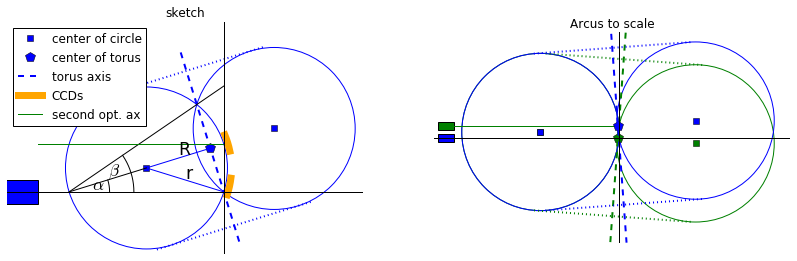

In [46]:
from matplotlib.patches import Circle, Rectangle
import mpl_toolkits.axisartist as AA

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(right=0.85)
ax1 = AA.Subplot(fig, 1, 2, 2, aspect='equal')
fig.add_subplot(ax1)
ax2 = AA.Subplot(fig, 1, 2, 1, aspect='equal')
fig.add_subplot(ax2)

def ax_middleaxes(ax):
    # make some axis invisible
    ax.axis["bottom", "top", "right", 'left'].set_visible(False)

    # make an new axis along the first axis axis (x-axis) which pass
    # throught y=0.
    ax.axis["y=0"] = ax.new_floating_axis(nth_coord=0, value=0,
                                      axis_direction="bottom")
    ax.axis["y=0"].toggle(all=True)
    #ax.axis["y=0"].label.set_text("y = 0")
    ax.axis["z=0"] = ax.new_floating_axis(nth_coord=1, value=0,
                                      axis_direction="left")
    ax.axis["z=0"].toggle(all=True)
    for s in ['y=0', 'z=0']:
        ax.axis[s].major_ticks.set_visible(False)
        ax.axis[s].major_ticklabels.set_visible(False)

    
def plot_rowland(ax, rowl, rowland, color='b', more_label='', **kwargs):
    '''kwargs can have additional parameters for more_label. Read the code to see which.'''
    r = rowland.r
    R = rowland.R
    circlecenters = np.stack([rowl['center'] + rowl['ex'] * R,
                              rowl['center'] - rowl['ex'] * R])
    # plot cirles
    ax.add_patch(Circle(circlecenters[0, [2, 0]], radius=r, fc="none", ec=color))
    ax.add_patch(Circle(circlecenters[1, [2, 0]], radius=r, fc="none", ec=color))

    # connect circles to make impression of a torus
    t = np.stack([np.vstack([rowl['center'] + (rowl['ex'] + rowl['ey']) * r,
                             rowl['center'] + (-rowl['ex'] + rowl['ey']) * r]),
                  np.vstack([rowl['center'] + (rowl['ex'] - rowl['ey']) * r,
                             rowl['center'] + (-rowl['ex'] - rowl['ey']) * r])], 
                 axis=1)
    ax.plot(t[:, :, 2], t[:, :,  0], ls=':', c=color, lw=2)

    # mark circle centers
    ax.plot(circlecenters[:, 2], circlecenters[:, 0], marker='s', ls='none', c=color, label='center of circle')

    # Rowland center and axis
    ax.plot(rowl['center'][2], rowl['center'][0], marker='p', c=color, ms=10, ls='none',
            label='center of torus')
    ax.plot([rowl['center'][2] + 1.5 * R * rowl['ey'][2], rowl['center'][2] - 1.5 * R * rowl['ey'][2]],
            [rowl['center'][0] + 1.5 * R * rowl['ey'][0], rowl['center'][0] - 1.5 * R * rowl['ey'][0]],
            linestyle='--', c=color, lw=2, label='torus axis')

    # optical axis
    if 'o' in more_label:
        ax.plot([kwargs['f'], 0], [kwargs['ypos']] * 2, color=color)
    
    # SPOs (mirror)
    if 'm' in more_label:
        width = 0.1 * r * kwargs.get('mirrorzoom', 1)
        height = 0.05 * r* kwargs.get('mirrorzoom', 1)
        ax.add_patch(Rectangle((kwargs['f'], kwargs['ypos'] - 0.5 * height), width, height, fc=color))
    
    # line and label for R
    if 'R' in more_label:
        ax.plot([circlecenters[0, 2], rowl['center'][2]],
                [circlecenters[0, 0], rowl['center'][0]], color=color)
        ax.text(np.mean([circlecenters[0, 2], rowl['center'][2]]), 
                1.1*np.mean([circlecenters[0, 0], rowl['center'][0]]),
                'R', fontsize='xx-large')
        
    # The following have a few hardcoded numbers in them that make sense only for the skectch.
    # Those can be generalized, but it just does not seem worth it right now.
    # I have however, used general expressions where it did not require any thinking already
    # so it should not be too hard to replace the remaining numbers if needed.
    
    # line and label for r
    if 'r' in more_label:
        ax.plot([circlecenters[0, 2], 0],
                [circlecenters[0, 0], 0], color=color)
        ax.text(np.mean([circlecenters[0, 2], 0]), 
                1.1*np.mean([circlecenters[0, 0], 0]),
                'r', fontsize='xx-large')
        
    # line and label for alpha
    if 'a' in more_label:
        ax.plot([circlecenters[0, 2], 1],
                [circlecenters[0, 0], 0], color='k')
        temp = np.arange(0, kwargs['alpha'], .001)
        x = circlecenters[0, 2] * 2 - 0.5 * r * np.cos(temp) 
        y = 0.5 * r * np.sin(temp)
        ax.plot(x, y, 'k')
        ax.text(1 - 0.3 * circlecenters[0, 2], 
                0.2*np.mean([circlecenters[0, 0], 0]),
                r'$\alpha$', fontsize='xx-large')
    
    # line and label for beta
    if 'b' in more_label:
        ax.plot([0, 1],
                [np.tan(kwargs['beta']), 0], color='k')
        temp = np.arange(0, kwargs['beta'], .001)
        x = circlecenters[0, 2] * 2 - 0.8 * r * np.cos(temp) 
        y = 0.8 * r * np.sin(temp)
        ax.plot(x, y, 'k')
        ax.text(1 - 0.5 * circlecenters[0, 2], 
                0.7*circlecenters[0, 0],
                r'$\beta$', fontsize='xx-large')
        
    # line and label for CCDs
    if 'd' in more_label:
        for l, angles in zip(['CCDs', '__no_legend__'], [[0.2, 0.4], [-0.32, -0.12]]):
            temp = np.arange(angles[0], angles[1], .001)
            x = circlecenters[0, 2] - 1.05 * r * np.cos(temp) 
            y = circlecenters[0, 0] + 1.05 * r * np.sin(temp)
            ax.plot(x, y, 'orange', lw=7, label=l)
    
ax_middleaxes(ax1)
plot_rowland(ax1, format_rowland_pos4d(rowlands[1], shifts[0]), rowlands[1], 'g', 
             more_label='mo', f=12500, ypos=2*conf['d'], mirrorzoom=2)
plot_rowland(ax1, format_rowland_pos4d(rowlands[0], shifts[0]), rowlands[0], 
             more_label='mo', f=12500, ypos=0, mirrorzoom=2)

ax1.set_xlim([14000, -13000])
ax1.set_ylim([-8000, 8000])
ax1.set_title("Arcus to scale")

from marxs.design.rowland import design_tilted_torus, RowlandTorus
from arcus.arcus import xyz2zxy
ax_middleaxes(ax2)
R, r, pos4d = design_tilted_torus(1., .3, .6)
rowland_sketch = RowlandTorus(R=R, r=r, pos4d=pos4d)
rowland_sketch.pos4d = np.dot(xyz2zxy, rowland_sketch.pos4d)
plot_rowland(ax2, format_rowland_pos4d(rowland_sketch), rowland_sketch, 
             more_label='Rrabmdo', alpha=0.3, beta=0.6, f=1.2, ypos=0, mirrorzoom=6)
ax2.plot([1.2, 0], [2*r*np.sin(0.3)] * 2, 'g', label='second opt. ax')
ax2.set_xlim([1.4, -.9])
ax2.set_ylim([-.4, 1.1])
ax2.set_title("sketch")
out = ax2.legend(numpoints=1, loc='upper left')


The figure above shows a conceptual sketch (left) and a to-scale drawing of the Arcus configuration (right) made from the numbers given in the tables above (display the code to see details). The sketch on the left shows only one Rowland torus and labels certain points and distances. The blue box on the side marks the position of the SPOs. The focal point is located at the origin of the coordinate system. The drawing shows a cut through the $y=0$ plane, which also contains the symmetry axis of the torus. This gives two circles of radius $r$ shown in blue. For the parameters chosen for Arcus, those two circles overlap. The dotted lines are intended to help visualize the position of the torus. In principle, we would like to chose $\alpha$ to be the blaze angle to make the blazed grating facets close to tangential to the Rowland Torus ([Heilmann et al., 2010](http://dx.doi.org/10.1117/12.856482)). However, in the Arcus design, the angle $\alpha$ also determines the position where the second optical axis is located: The Rowland torus for the second pair of channels needs to be placed in such a way that the *Rowland circles* overlap (see right figure) to bring the signal from all channels into focus at the same position so that the CCD readouts can be shared. Thus, the second optical axis is parallel to the first one (thin green lines in the figures) and located such that it intersects the Rowland circle at $z=0$. For blazed gratings (see below) most of the dispersed signal is detected around twice the blaze angle. We want to locate this position close to the second optical axis and thus pick an $\alpha$ close to twice the blaze angle.

Gratings are placed on the Rowland torus for a range of $\varphi$ and $\theta$ values (see torus formula above) so that they cover the area directly behind of the SPOs. The dispersion direction in this plot is up. The position of the two CCD strips is indicated by orange bars. Note that both CCD strips cover the range of the Rowland circle to the right of the axis, i.e. that CCDs are further from the SPOs then one focal length.

The to-scale diagram on the right shows the two Rowland tori in blue and green, where the coordinate system is centered on the focal point of the the blue channel. A blue and green box on the left indicate the positions of the corresponding SPO petals (the boxes are not to scale for the actual SPOs). On this drawing CCDs are not shown for clarity.

### Position of tori relative to each other

In [47]:
Markdown('''The coordinates of the tori given above are given in the coordinate system for each optical channel, 
in other words, the coordinates of torus 1 are in the system of channel 1 and the coordinates of channel 2 in the system 2.
The two systems are offset to one another in cross-dispersion direction so that the two dispersed 
spectra do no overlap on the CCDs. The value for Arcus is {:6.2f} mm.
The linear distance measured along the axis of the cartesian coordinate system
between the focal points in dispersion direction is {:6.2f} mm. 
'''.format(2 * defaultconf['offset_spectra'], 2 * defaultconf['d']))

The coordinates of the tori given above are given in the coordinate system for each optical channel, 
in other words, the coordinates of torus 1 are in the system of channel 1 and the coordinates of channel 2 in the system 2.
The two systems are offset to one another in cross-dispersion direction so that the two dispersed 
spectra do no overlap on the CCDs. The value for Arcus is  10.00 mm.
The linear distance measured along the axis of the cartesian coordinate system
between the focal points in dispersion direction is 874.30 mm. 


## Placing grating facets on the torus

The equations of the Rowland torus tell us *where* to place the CAT gratings, but not which *orientation* they should have. For now, let us assume that we place the center of the grating exactly on the Rowland torus. Since the grating is flat, that means that most of the grating surface is either above or below the Rowland torus. Naively, one might think that a better place would be to move the grating slightly inward, but this is not as simple as it sounds, because usually the gratings are not tangential to the Rowland torus, but have a different orientation, which we will now explain.

### General prescription for blazed gratings

In a Rowland geometry with traditional transmission gratings the grating surface shall be perpendicular to the incoming rays. The exact impact of other orientations on the performance of the instrument can be simulated with ray-trace simulations. The most important effects typically are a drop in grating efficiency (and thus the effective area) for non-normal incidence and a decrease in spectral resolution when the the grating bars are not perpendicular to the intended dispersion direction.
Thus, we want the surface normal vector for a grating at position $\vec p$ to be $$\vec n = \frac{\vec p}{|\vec p|}$$ in the OCCS because all rays point to the focal point, which is located at the origin of the coordinate system. We note that the position directly on the optical axis is the only position where the direction $\vec n$ is also normal to the surface of the Rowland torus. In general, $\vec n$ is tilted with respect to the torus surface.

Specifying the normal to the surface still leaves one degree of freedom: rotation around the normal $\vec n$. We fix this by requiring that the direction of the grating bars $\vec e_\mathrm{bar}$ is perpendicular to the diffraction direction, which is $\vec e_x$ in our coordinate system: $$\vec e_\mathrm{bar} \times \vec e_x = \vec 0\ \ .$$

In [48]:
Markdown('''
For CAT gratings, the optimal incidence angle is not exactly normal to the grating surface. 
Thus, CAT grating need to be rotated around $\\vec e_\\mathrm{{bar}}$ by the blaze angle.
For the gratings used in Arucs, that blaze angle is +/-{:4.2f} degrees.'''.format(defaultconf['blazeang']))


For CAT gratings, the optimal incidence angle is not exactly normal to the grating surface. 
Thus, CAT grating need to be rotated around $\vec e_\mathrm{bar}$ by the blaze angle.
For the gratings used in Arucs, that blaze angle is +/-1.91 degrees.

The sign of the blaze angle determines to which side the grating blazes. $\vec n$ is parallel to the walls of the grating bars. At the critical angle, photons reflect off this wall. The following sketch illustrates this concept.

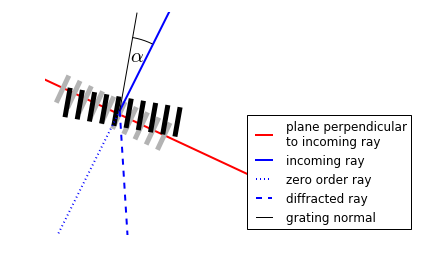

In [49]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, aspect='equal')
    
l = 20
d = 10
alpha = np.deg2rad(100)
step = np.arange(20, 120, d)
x = 100 + np.sin(alpha) * step
y = 340 + np.cos(alpha) * step
x1 = x + l * np.sin(alpha + np.pi/2)
y1 = y + l * np.cos(alpha + np.pi/2)

linerange = np.array([-100, 200])
gamma = np.deg2rad(115)
ax.plot(100 + np.sin(gamma) * linerange, 
        345 + np.cos(gamma) * linerange,'r', lw=2, label='plane perpendicular\nto incoming ray')

# Light gray bars for traditional transmission grating
xt = 100 + np.sin(gamma) * step
yt = 355 + np.cos(gamma) * step
x1t = xt + l * np.sin(gamma + np.pi/2)
y1t = yt + l * np.cos(gamma + np.pi/2)
ax.plot(np.vstack([xt, x1t]), np.vstack([yt, y1t]), '0.7', lw=5) #, label='normal grating')


ax.plot(np.vstack([x, x1]), np.vstack([y, y1]), 'k', lw=5) #, label='CAT grating')
ax.plot([200, 160], [400, 320], 'b', lw=2, label='incoming ray')
ax.plot([160, 0], [320, 0], ls=':', color='b', lw=2, label='zero order ray')
ax.plot([160, 180], [320, 0], ls='--', color='b', lw=2, label='diffracted ray')
ax.plot([160, 160 + np.sin(alpha - np.pi / 2) * 80], 
        [320, 320 + np.cos(alpha - np.pi / 2) * 80], 'k', label='grating normal')
phi = np.arange(0.18, .45, .001)
ax.plot(160 + np.sin(phi) * 60, 
        320 + np.cos(phi) * 60, 'k')
ax.text(168, 360, r'$\alpha$', size=20)
ax.set_ylim(220, 400)
ax.set_xlim(100, 400)
ax.set_ylabel('Optical axis')
ax.legend(loc='lower right')
ax.set_axis_off()
out = ax.set_xlabel('Dispersion direction')

In this plot, the solid blue line is the path of the incoming photon. The red line is perpendicular to the incoming photon and would be the plane of a traditional transmission grating (gray grating bars). Instead, the CAT grating is blazed by the angle $\alpha$ which makes photons "bounce off" the walls of the grating bars (thick black lines) and all the dispersed signal ends up towards the right of the zeroth order. If instead, the blaze angle was $-\alpha$, photons would "bounce off" the other side of the grating bars and would be blazed towards a location to the left of the zeroth order.

Note that for the blaze angle $\alpha$ the angle between the incoming ray (solid blue line) and the diffracted ray (dashed blue line) is $2 \alpha$. Sometimes this $2 \alpha$ angle is called "blaze angle" in the literature, which can lead to confusion. 

### Example

Finally, we can put all these pieces together and derive a grating position and orientation for a single grating as an example. The purpose of this example is two-fold. First, it illustrates the steps listed above with some concrete numbers and second, it provides a cross-check for any independent implementation of this algorithm. The numbers given in the following are derived using the same functions and methods that power the ray-traces of Arcus. Detailed analysis of the ray-traces has not revealed any systematic error in the location and width of dispersed orders, so any deviation to these reference numbers should be investigated carefully.

In [50]:
# Make a Rowland torus with the properties in the table above
# rowland[0] is very similar, but in global coordinates.
# To display the example here if would be nice not have to do that coordiante transformation all the time.
from marxs.design import RowlandTorus
rowland = RowlandTorus(R=rowlands[0].R, r=rowlands[0].r, pos4d=np.dot(shifts[0], rowlands[0].pos4d))

In [51]:
from marxs.optics import FlatOpticalElement
from arcus.ralfgrating import RectangularGrid
from transforms3d import axangles

blazemat = axangles.axangle2mat(np.array([0, 1, 0]), np.deg2rad(-defaultconf['blazeang']))

grid = RectangularGrid(rowland=rowland, 
                       y_range=[500, 520], x_range=[100, 120], z_range=[1e4, 1.4e4],
                       d_element=20, elem_class=FlatOpticalElement,
                       elem_args={'orientation': blazemat},
                       normal_spec=np.array([0, 0, 0., 1.]))
# copy of the line above without the blaze
gridnoblaze = RectangularGrid(rowland=rowland, 
                       y_range=[500, 520], x_range=[100, 120], z_range=[1e4, 1.4e4],
                       d_element=20, elem_class=FlatOpticalElement,
                       normal_spec=np.array([0, 0, 0., 1.]))
pos = grid.elem_pos[0]
elem=grid.elements[0]

In [52]:
text = r'''Let's assume that we look at a drawing of the distribution of SPOs and 
decide that $x = {x}$ and $y={y}$ would be a good location for a CAT grating. 
We need to determine the $z$ value by looking at the Rowland torus. 
There might be up to four points on the torus that match $x$ and $y$, but we know that we 
are looking for the solution that is closest to the SPOs. The value of $z$ should be about one focal length 
from the origin of the coordinate system.
Several approaches are possible. For example, we can take eqn (3) and the parameters given in the 
table and solve numerically for $\varphi$ and $\theta$ values that return the requested $x$ and $y$ and 
then calculate $z$. 
'''.format(x=pos[0, 3], y=pos[1, 3])
text = text + r'''Another way is to describe this problem as a line in the form
$$g=\begin{pmatrix}x\\y\\0\end{pmatrix} + k \begin{pmatrix}0\\0\\1\end{pmatrix}\ \ .$$
The two vectors can be written in homogeneous coordinates and transformed into the natural coordinate system of the
torus using the inverse of the 4d matrix in the table above. 
We can then solve eqn (1) to find $z$, which we transform back into the 
original coordinate system. This is what the MARXS software does internally. '''
text  = text + 'In either case, the resulting value should be $z={z:8.2f}$.'.format(z=pos[2, 3])
Markdown(text)

Let's assume that we look at a drawing of the distribution of SPOs and 
decide that $x = 110.0$ and $y=510.0$ would be a good location for a CAT grating. 
We need to determine the $z$ value by looking at the Rowland torus. 
There might be up to four points on the torus that match $x$ and $y$, but we know that we 
are looking for the solution that is closest to the SPOs. The value of $z$ should be about one focal length 
from the origin of the coordinate system.
Several approaches are possible. For example, we can take eqn (3) and the parameters given in the 
table and solve numerically for $\varphi$ and $\theta$ values that return the requested $x$ and $y$ and 
then calculate $z$. 
Another way is to describe this problem as a line in the form
$$g=\begin{pmatrix}x\\y\\0\end{pmatrix} + k \begin{pmatrix}0\\0\\1\end{pmatrix}\ \ .$$
The two vectors can be written in homogeneous coordinates and transformed into the natural coordinate system of the
torus using the inverse of the 4d matrix in the table above. 
We can then solve eqn (1) to find $z$, which we transform back into the 
original coordinate system. This is what the MARXS software does internally. In either case, the resulting value should be $z=11896.08$.

In [53]:
import transforms3d

def vecflat(vec):
    strs = ['{:8.5g}'.format(f) for f in vec]
    return '({})'.format(', '.join(strs))

vec = pos[:, 3]
vec[3] = 0
text = '''
The vector from point ${0}$ to the focal point is obviously ${1}$ in our coordinate system.
Normalizing to unit lenght yields ${2}$. 
'''.format(vecflat(pos[:3, 3]), vecflat(vec[:3]), vecflat(vec[:3] / np.sqrt((vec**2).sum())))
text = text + '''Now we need to choose the rotation such that the 
direction of the grooves is perpendicular to $\\vec e_x$, which gives $\\vec e_\mathrm{{groove}}={0}$ and finally we rotate the direction
vector above by the blaze angle around the groove direction to obtain the surface normal $\\vec n$
of the CAT grating:'''.format(vecflat(grid.elements[0].geometry('e_y')[:3]))
rot = transforms3d.axangles.axangle2mat(gridnoblaze.elements[0].geometry('e_y')[:3], 
                                        np.deg2rad(-defaultconf['blazeang']))

text = text + r''' $$\vec n = {0} {1} = {2}$$'''.format(mat3format(rot), 
                                         vecformat(gridnoblaze.elements[0].geometry('e_x')[:3], '6.4f'),
                                         vecformat(grid.elements[0].geometry('e_x')[:3], '6.4f'))
Markdown(text)


The vector from point $(     110,      510,    11896)$ to the focal point is obviously $(     110,      510,    11896)$ in our coordinate system.
Normalizing to unit lenght yields $(0.0092379,  0.04283,  0.99904)$. 
Now we need to choose the rotation such that the 
direction of the grooves is perpendicular to $\vec e_x$, which gives $\vec e_\mathrm{groove}=(-0.21064, -0.97658, 0.043815)$ and finally we rotate the direction
vector above by the blaze angle around the groove direction to obtain the surface normal $\vec n$
of the CAT grating: $$\vec n = \begin{pmatrix}
0.9995 & 0.001575 & 0.03254\\ 
-0.001346 &      1 & -0.007044\\ 
-0.03255 & 0.006997 & 0.9994\\ 
\end{pmatrix}
 \begin{pmatrix}
0.0092\\ 
0.0428\\ 
0.9990\\ 
\end{pmatrix}
 = \begin{pmatrix}
0.0418\\ 
0.0358\\ 
0.9985\\ 
\end{pmatrix}
$$

## Placing CCD detectors

Placing CCD detectors is easier than CAT gratings, because no blaze is involved and the angle under which the rays hit the detectos is not important. Thus, CCDs are placed solely with the goal in mind we arrange them such that they follow the shape of the Rowland circle as much as possible. This implies that there is no "focal plane", but instead that the CCDs are each tilted with respect to each other. Obviously, the CCDs cover only a very small angle of the full Rowland circle. Optimizing the exact placement to capture as much signal as possible is done elsewhere, here we only list the position of the Rowland torus, or more precisely the Rowland circle. The dispersed signal forms a line starting from the optical axis, this detectors do not need ot cover a 2-d space on the Rowland torus, but just a single line with $\theta = 0$ in eqn (2) or (3), effectily reducing the 3-d Rowland torus to a 2-d Rowland circle. 

In [54]:
display_codetoggle()